<a href="https://colab.research.google.com/github/SakshamWase/Projects_developed/blob/main/Air_Passenger_Forecasting_Time_Series_SW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3]:
data=pd.read_csv("/content/AirPassengers.csv")

In [4]:
data

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [ ]:
# Step1. Data loading
# Step2. Checking the stationarity
# Step3. if the data is non- stationary then make it stationary using some techniques like tranformation,differencing etc
# Step4. Checking the stationarity
# Step5.Model implementation

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [6]:
data["Month"]=pd.to_datetime(data["Month"])

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [8]:
#checking null values
data.isnull().sum()

Month          0
#Passengers    0
dtype: int64

In [9]:
data

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


In [10]:
data.set_index(["Month"],inplace=True)

In [11]:
data

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


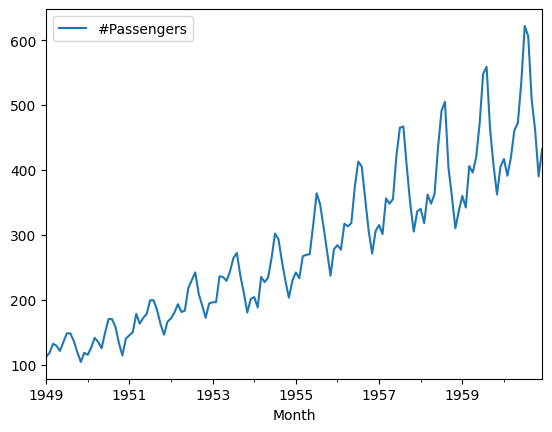

In [12]:
data.plot()
plt.show()

In [ ]:
# adfuller Test - used to check the stationarity in the data

# null hypothesis- the data  is non- stationary
# alternate hypothesis -the data is stationary

In [13]:
#checking the stationarity
#f- format while print statement is used

from statsmodels.tsa.stattools import adfuller

#ADF Test - if the p-value < 0.05 - Data is stationary
result = adfuller(data)

print(f'ADF Statistic,{result[0]}') #some default value based upon the critial values
print(f'p-value={result[1]}')

#print(f'Result: The series is {"not " if result[1]>0.05 else ""}stationary')

if(result[1]>0.05):
    print("The series is not stationary")
else:
    print("series is stationary")

ADF Statistic,0.8153688792060498
p-value=0.991880243437641
The series is not stationary


In [14]:
#Rolling stats
mean_log=data.rolling(window=12).mean()
std_log=data.rolling(window=12).std()

In [15]:
mean_log.head(20)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


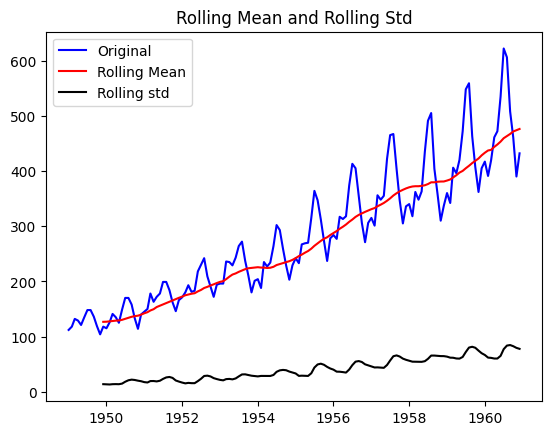

In [16]:
#Lets plot the rolling mean and rolling std
plt.plot(data,color='blue',label='Original')
plt.plot(mean_log,color='red',label='Rolling Mean')
plt.plot(std_log,color='black',label='Rolling std')

plt.legend(loc='best')
plt.title('Rolling Mean and Rolling Std')
plt.show()

In [17]:
#Transformations
first_log=np.log(data)

In [18]:
first_log = first_log.dropna()

In [19]:
#Rolling stats
mean_log=first_log.rolling(window=12).mean()
std_log=first_log.rolling(window=12).std()

In [20]:
mean_log

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
...,...
1960-08-01,6.124517
1960-09-01,6.132246
1960-10-01,6.142628


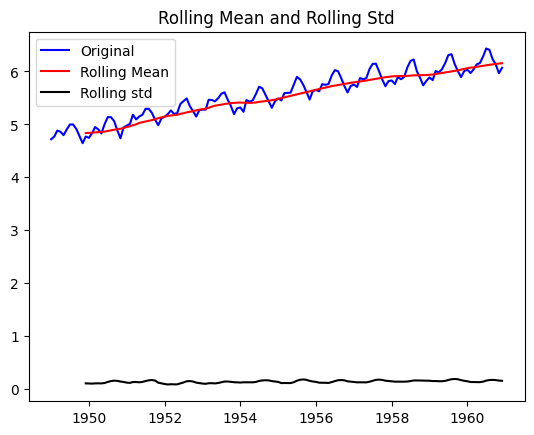

In [21]:
#Lets plot the rolling mean and rolling std
plt.plot(first_log,color='blue',label='Original')
plt.plot(mean_log,color='red',label='Rolling Mean')
plt.plot(std_log,color='black',label='Rolling std')

plt.legend(loc='best')
plt.title('Rolling Mean and Rolling Std')
plt.show()

In [23]:
new_data = first_log - mean_log
new_data = new_data.dropna()
new_data.head()

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142


In [24]:
mean_log=new_data.rolling(window=12).mean()
std_log=new_data.rolling(window=12).std()

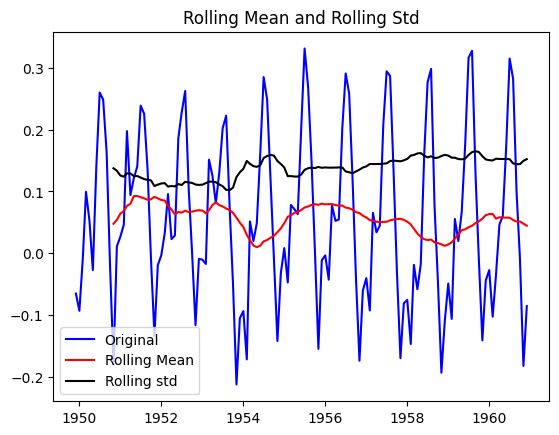

In [25]:
#Lets plot the rolling mean and rolling std
plt.plot(new_data,color='blue',label='Original')
plt.plot(mean_log,color='red',label='Rolling Mean')
plt.plot(std_log,color='black',label='Rolling std')

plt.legend(loc='best')
plt.title('Rolling Mean and Rolling Std')
plt.show()

In [ ]:
# adfuller Test - used to check the stationarity in the data

# null hypothesis- the data  is non- stationary
# alternate hypothesis -the data is stationary

In [26]:
#checking the stationarity
#f- format while print statement is used

from statsmodels.tsa.stattools import adfuller

#ADF Test - if the p-value < 0.05 - Data is stationary
result = adfuller(new_data)

print(f'ADF Statistic,{result[0]}') #some default value based upon the critial values
print(f'p-value={result[1]}')

#print(f'Result: The series is {"not " if result[1]>0.05 else ""}stationary')

if(result[1]>0.05):
    print("The series is not stationary")
else:
    print("series is stationary")

ADF Statistic,-3.1629079913008833
p-value=0.022234630001242206
series is stationary


In [ ]:
# 0.02<0.05

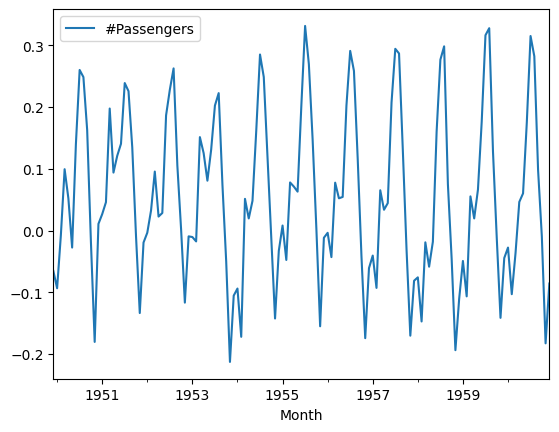

In [27]:
new_data.plot()
plt.show()

In [ ]:
p =?
d= 1
q=?

In [ ]:
#AR - q - ACF - linear combination of past observations.

#MA - p - PACF - linear combination of past error terms.

In [29]:
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

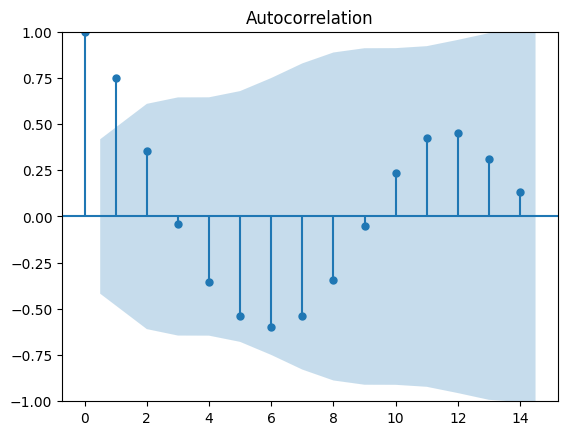

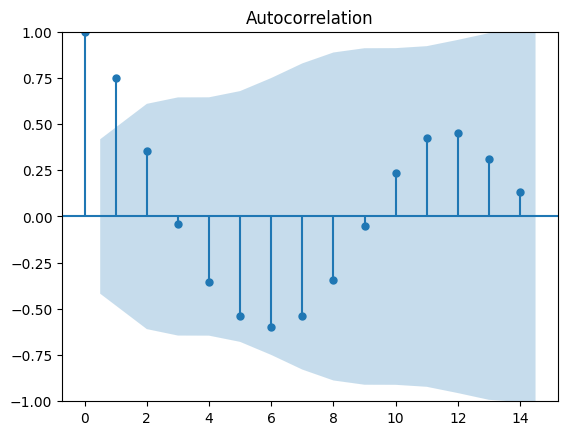

In [30]:
acf_plot=acf(new_data.dropna()) #most recent positive value before getting -ve
plot_acf(acf_plot)

In [ ]:
# q=>>2


In [31]:
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_pacf

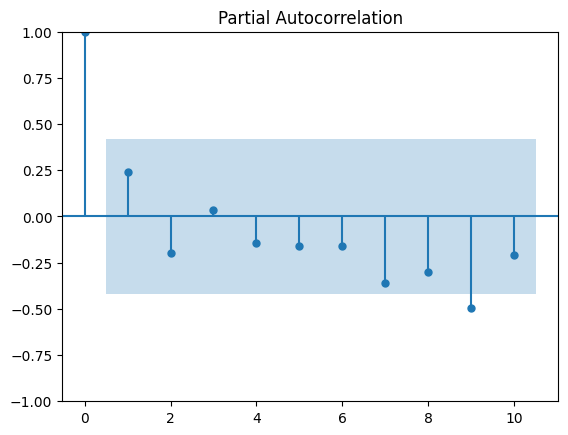

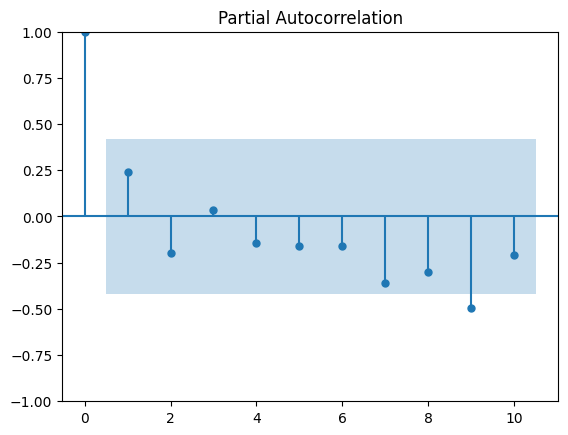

In [32]:
pacf_plot=pacf(new_data.dropna()) #th data point or lag where there is a sudden shut-off - 2
plot_pacf(pacf_plot, lags=10)

In [ ]:
# p=>>1

In [ ]:
# p=1
# d=1
# q=2

In [33]:
from statsmodels.tsa.arima.model import ARIMA

In [34]:
new_data

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
...,...
1960-08-01,0.282363
1960-09-01,0.098235
1960-10-01,-0.009230


In [35]:
#splitting the data into training and testing
train=new_data.iloc[:120]['#Passengers']
test=new_data.iloc[120:]['#Passengers']

In [36]:
train

Month
1949-12-01   -0.065494
1950-01-01   -0.093449
1950-02-01   -0.007566
1950-03-01    0.099416
1950-04-01    0.052142
                ...   
1959-07-01    0.316430
1959-08-01    0.327838
1959-09-01    0.128057
1959-10-01   -0.011315
1959-11-01   -0.141406
Name: #Passengers, Length: 120, dtype: float64

In [37]:
test

Month
1959-12-01   -0.044481
1960-01-01   -0.027530
1960-02-01   -0.103067
1960-03-01   -0.036530
1960-04-01    0.046332
1960-05-01    0.060186
1960-06-01    0.175033
1960-07-01    0.315151
1960-08-01    0.282363
1960-09-01    0.098235
1960-10-01   -0.009230
1960-11-01   -0.182690
1960-12-01   -0.085789
Name: #Passengers, dtype: float64

In [38]:
from statsmodels.tsa.arima.model import ARIMA

In [39]:
model = ARIMA(train,order=(1,1,2)) #(p,d,q)
model_fit=model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [41]:
len(train)

120

In [40]:
len(test)

13

<Axes: xlabel='Month'>

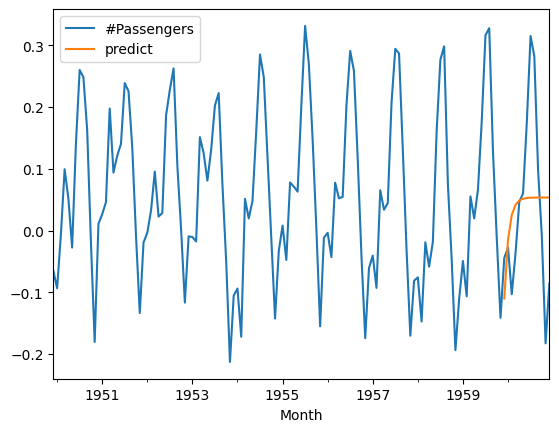

In [42]:
new_data['predict']=model_fit.predict(start=len(train),end=len(train)+len(test)-1, dynamic=True)
new_data[['#Passengers','predict']].plot()

In [ ]:
# SARIMA- seasonal autoregressive integrated moving averages
# SARIMAX- seasonal autoregressive integrated moving averages exogeneous variable

In [43]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [44]:
model=SARIMAX(train,order=(1,1,2),seasonal_order=(1,1,2,12)) #seasonal_order=(p,d,q,s)
model=model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<Axes: xlabel='Month'>

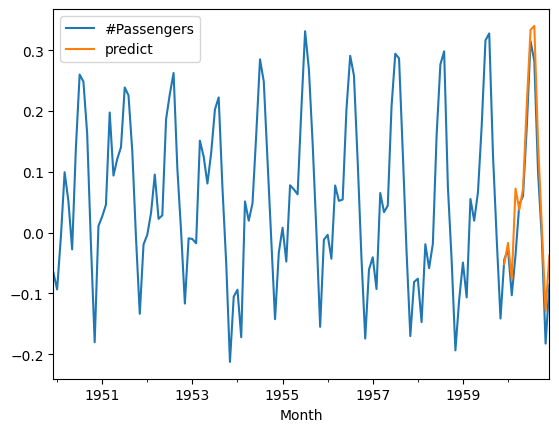

In [45]:
new_data['predict']=model.predict(start=len(train),end=len(train)+len(test)-1, dynamic=True)
new_data[['#Passengers','predict']].plot()

<Axes: xlabel='Month'>

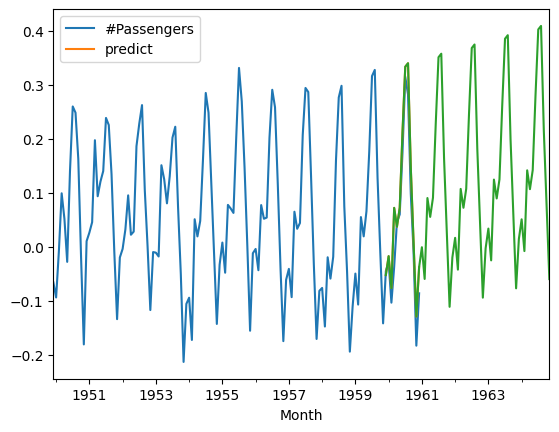

In [46]:
forecast = model.forecast(steps=60) #5 years
new_data.plot()
forecast.plot()